In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('eurovision_song_contest_1975_2022.xlsx')

In [3]:
#Removing unwanted observations and columns
df = df.drop(df.index[df['Duplicate'] == 'x'])
df = df.drop(['Edition', 'Duplicate',], axis = 1)
df = df.drop(df.index[df['Year'] < 2008]) #Dropping the years before 2008
#Replacing Country names
df = df.replace(to_replace ="F.Y.R. Macedonia",
                 value ="North Macedonia")
df = df.replace(to_replace ="Macedonia",
                 value ="North Macedonia")
df = df.replace(to_replace ="Netherlands",
                 value ="The Netherlands")

uniqueValues = df['From country'].unique()
print('Countries who participated in Eurovision from 2008-2022')
print(uniqueValues)
print('The total number of countries is')
len(uniqueValues)


Countries who participated in Eurovision from 2008-2022
['Albania' 'Andorra' 'Armenia' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'North Macedonia' 'Finland' 'France' 'Georgia'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Latvia'
 'Lithuania' 'Malta' 'Moldova' 'Montenegro' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'The Netherlands' 'Turkey' 'Ukraine' 'United Kingdom'
 'Slovakia' 'Austria' 'Italy' 'Australia']
The total number of countries is


47

### See which country has gotten 12 points most frequently ( in both semifinals as well as the finals)

In [4]:
douze = df[df['Points      '] == 12][['Jury or Televoting', 'From country', 'To country', 'Points      ']]
douze['To country'].value_counts() #here we are just calcualting the frequency of 12s for each country (values from the 'To country' column )
#This includes 12s from both the jury votes and televotes

Sweden                  139
Ukraine                 117
Russia                   85
Serbia                   70
Greece                   65
Azerbaijan               60
Portugal                 57
Norway                   55
Armenia                  49
Italy                    48
Denmark                  48
The Netherlands          46
Moldova                  45
Lithuania                43
Cyprus                   43
Bulgaria                 42
Australia                40
Austria                  39
Iceland                  35
Albania                  34
Romania                  34
Israel                   32
Belgium                  30
Bosnia & Herzegovina     27
North Macedonia          27
Malta                    26
Switzerland              25
Turkey                   25
Estonia                  24
Hungary                  20
Spain                    19
France                   18
Finland                  18
Czech Republic           17
Belarus                  16
Germany             

Sweden has received the most number of 12s. #Maybe interesting to see if this is consistent with Jury votes and Televotes alone. 

### See which country got 0 score the most frequently

In [7]:
zero = df[df['Points      '] == 0][['From country', 'To country', 'Jury or Televoting', 'Points      ']]
zero['To country'].value_counts() # Calculating frequency of 0s from the 'To Country' column for each country

Germany                 625
Spain                   593
United Kingdom          589
Albania                 536
Serbia                  523
Azerbaijan              519
Greece                  510
Cyprus                  501
Lithuania               499
Finland                 482
France                  478
Moldova                 462
Iceland                 461
Israel                  446
Denmark                 445
Estonia                 430
Romania                 427
Slovenia                427
Norway                  425
The Netherlands         419
Hungary                 407
Armenia                 401
Poland                  401
Georgia                 393
San Marino              387
Belarus                 386
Belgium                 384
Malta                   378
Ireland                 373
Ukraine                 347
Croatia                 347
Portugal                343
Austria                 342
Czech Republic          337
Latvia                  336
Sweden              

Germany received the most number of 0s followed be Spain based on both Jury and Televotes together. 

### See which countries give the most number of 12 points to other countries

In [9]:
douze_to = douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')#Group the douze dataframe by the columns To country and then From country
douze_to.drop_duplicates(subset = ['To country'], keep ='first', inplace=True) #Drops the replicates of each country so we only have one value per country 
douze_to 

,To country,From country,counts
0,Greece,Cyprus,21
1,Cyprus,Greece,18
2,Romania,Moldova,17
3,Serbia,Montenegro,14
4,Moldova,Romania,13
5,Russia,Azerbaijan,12
6,Albania,North Macedonia,12
8,Sweden,Denmark,11
9,Lithuania,Ireland,10
12,Ukraine,Poland,9


### See which countries give the most 0 scores to other countries

In [10]:
zero_to = zero.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts') #Groups the zero dataframe first by To country and then by From country
zero_to.drop_duplicates(subset = ['To country'], keep ='first', inplace=True)  #Drops the replicates of each country so we only have one value per country 
zero_to

,To country,From country,counts
0,Azerbaijan,Armenia,26
1,Armenia,Azerbaijan,25
2,Albania,Latvia,24
3,Serbia,Denmark,23
4,Finland,Greece,22
5,Iceland,Azerbaijan,22
6,Lithuania,North Macedonia,22
7,Greece,Iceland,21
18,Israel,Estonia,19
23,Estonia,San Marino,19


### Average points per country

In [11]:
average_points = df.groupby('To country').agg({'Points      ': ['mean']}).sort_values(('Points      ', 'mean'), ascending = False)

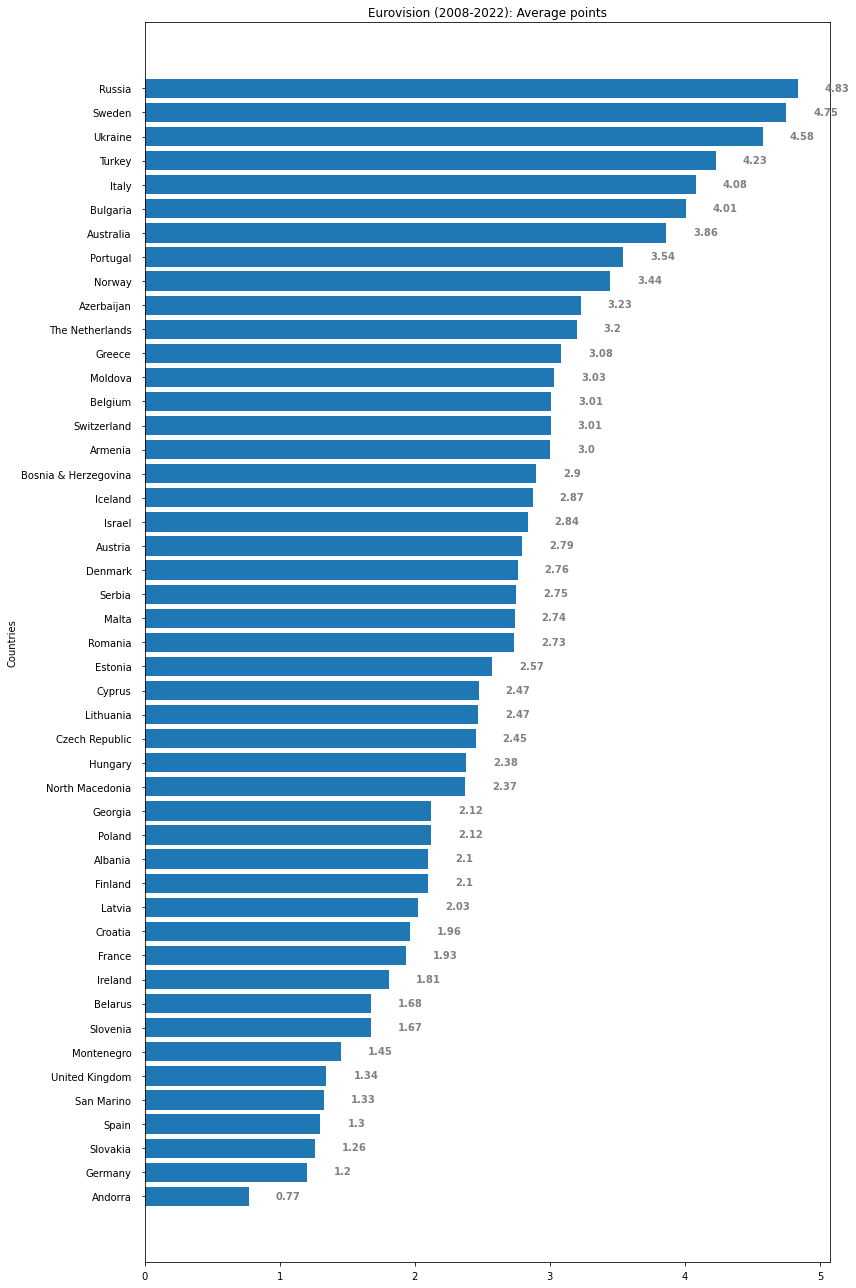

In [12]:
labels = average_points[('Points      ', 'mean')].index
avg_points = list(average_points[('Points      ', 'mean')])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)
ax.invert_yaxis()
ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2022): Average points')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
fig.tight_layout()
plt.show()

Average scores separately for the semi-finals and the finals¶